![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

### Stationary Processes and Z-Scores
The majority of time-series statistical forecasting methods are based on the assumption that the series being used is stationary or approximately stationary, whether on its own or through the use of transformations.

Briefly stated, a stationary series is one whose joint probability distribution remains the same over time. Put another way, it is a process whose mean, variance, autocorrelation, etc. are all constant over time. 

Stationary series are useful because we can assume that their current statistical properties will remain constant. Given stationarity, we know approximately what future values will be and what sort of error will be present in our forecast, and this naturally leads us to think of taking advantage of the mean-reverting behavior of stationary series for trading purposes.

Unfortunately, equity prices are never stationary. However, we are able to approximate a stationary series by using the returns ("differencing" the series). This preserves the sequential nature of the series and other important properties and is usually a sufficient transformation to render a time-series stationary.

In [2]:
# Import our custom functions
from StationarityAndZScores import *

# Import the Liquid ETF Universe helper methods
from QuantConnect.Data.UniverseSelection import *

# Initialize QuantBook and the Sector ETFs
qb = QuantBook()
symbols = [x for x in LiquidETFUniverse.SP500Sectors]

In [3]:
# Fetch history and returns
history = qb.History(symbols, 500, Resolution.Hour)
returns = history.unstack(level = 1).close.transpose().pct_change().dropna()

To ensure that we can act on our assumption of stationarity, we need to test the data. One of the most common tests for stationarity is the augmented Dickey-Fuller (ADF) test. An ADF test operates on the null-hypothesis that a unit is present in a time series sample (i.e. the time-series is not stationary). Therefore, when we apply the test to our transformed data, we want to look for a p-value of less than 0.05 so that we can confidently reject the null-hypothesis in favor of the alternative: the series is stationary.

In [4]:
# Test for stationarity
stationarity = TestStationartiy(returns)
stationarity

symbol
XLB RGRPZX100F39    True
XLE RGRPZX100F39    True
XLF RGRPZX100F39    True
XLI RGRPZX100F39    True
XLK RGRPZX100F39    True
XLP RGRPZX100F39    True
XLU RGRPZX100F39    True
XLV RGRPZX100F39    True
XLY RGRPZX100F39    True
dtype: bool

Normalizing the returns data allows use to trade based on the z-score. This will give us an idea of how far of an outlier a given return is relative to its historical mean and variance.

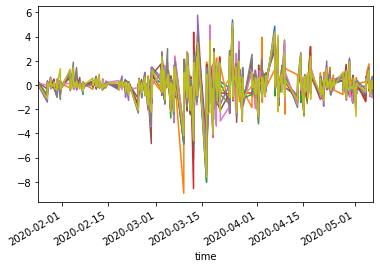

In [5]:
# Get z-score
z_scores = GetZScores(returns)
z_scores.plot(legend = None)
plt.show()

##### Functions to test for stationarity and z-scores

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def TestStationartiy(returns):
    # Return pandas Series with True/False for each symbol
    return pd.Series([adfuller(values)[1] < 0.05 for columns, values in returns.iteritems()], index = returns.columns)
    
def GetZScores(returns):
    # Return pandas DataFrame containing z-scores
    return returns.subtract(returns.mean()).div(returns.std())